# The Probability Density Function - Lab

## Introduction
In this lab, we will look at building visualizations known as **density plots** to estimate the probability density for a given set of data. 

## Objectives

You will be able to:

* Calculate the PDF from a given dataset containing real-valued random variables
* Plot density functions and comment on the shape of the plot
* Plot density functions using seaborn

## Let's get started

Let's import the necessary libraries for this lab.

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import pandas as pd 

## Import the data, and calculate the mean and the standard deviation

- Import the dataset 'weight-height.csv' as a pandas dataframe.

- Next, calculate the mean and standard deviation for weights and heights for men and women individually. You can simply use the pandas `.mean()` and `.std()` to do so.

**Hint**: Use your pandas dataframe subsetting skills like loc(), iloc() and groupby()

In [2]:
data = pd.read_csv('weight-height.csv')
male_df = data[data.Gender == 'Male']
female_df = data[data.Gender == 'Female']
print(f"Male Height mean: {male_df.Height.mean()}")
print(f"Male Height sd: {male_df.Height.std()}")
print(f"Male Weight mean: {male_df.Weight.mean()}")
print(f"Male Weight sd: {male_df.Weight.std()}")
print(f"Female Height mean: {female_df.Height.mean()}")
print(f"Female Height sd: {female_df.Height.std()}")
print(f"Female Weight mean: {female_df.Weight.mean()}")
print(f"Female Weight sd: {female_df.Weight.std()}")

# Male Height mean: 69.02634590621737
# Male Height sd: 2.8633622286606517
# Male Weight mean: 187.0206206581929
# Male Weight sd: 19.781154516763813
# Female Height mean: 63.708773603424916
# Female Height sd: 2.696284015765056
# Female Weight mean: 135.8600930074687
# Female Weight sd: 19.022467805319007

Male Height mean: 69.02634590621737
Male Height sd: 2.8633622286606517
Male Weight mean: 187.0206206581929
Male Weight sd: 19.781154516763813
Female Height mean: 63.708773603424916
Female Height sd: 2.696284015765056
Female Weight mean: 135.8600930074687
Female Weight sd: 19.022467805319007


## Plot histograms (with densities on the y-axis) for male and female heights 

- Make sure to create overlapping plots
- use binsize = 10, set alpha level so that overlap can be visualized

Text(0, 0.5, 'Frequency')

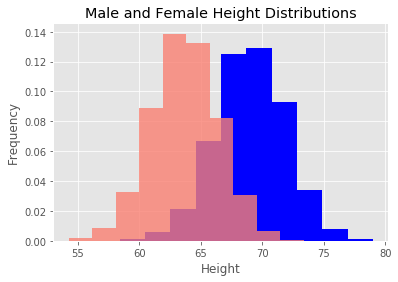

In [3]:
plt.hist(male_df.Height, density=True, color='blue', bins=10)
plt.hist(female_df.Height, density=True, alpha = 0.8, color='salmon', bins=10)
plt.title('Male and Female Height Distributions')
plt.xlabel('Height')
plt.ylabel('Frequency')

In [18]:
# Record your observations - are these inline with your personal observations?
# According to the data, males are likely to be taller than females.  
# The distributions are similarly shaped, but the male distribution is shifted towards higher values.  
# This is inline with my personal observations.

## Create a density function using interpolation


- Write a densit function density() that uses interpolation and takes in a random variable
- Use`np.hist`
- The function should return two lists carrying x and y coordinates for plotting the density function

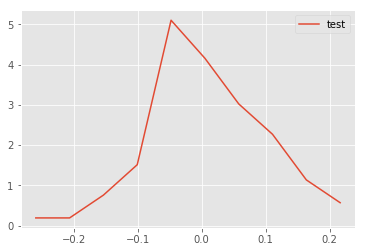

In [5]:
def density(x):
    n, bins = np.histogram(x, density=1)
    pdfx = np.zeros(n.size)
    pdfy = np.zeros(n.size)
    for k in range(n.size):
        pdfx[k] = 0.5*(bins[k]+bins[k+1])
        pdfy[k] = n[k]
    return pdfx,pdfy

# Generate test data and test the function - uncomment to run the test
np.random.seed(5)
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 100)
x,y = density(s)
plt.plot(x,y, label = 'test')
plt.legend()

## Add Overlapping density plots to the histograms plotted earlier

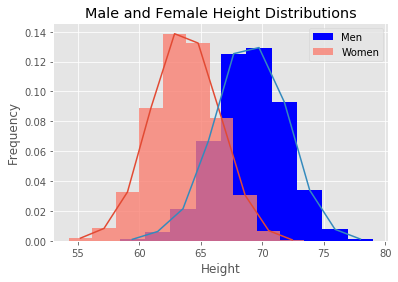

In [6]:
plt.hist(male_df.Height, density=True, color='blue', bins=10, label='Men')
plt.hist(female_df.Height, density=True, alpha = 0.8, color='salmon', bins=10, label='Women')
plt.legend()
plt.title('Male and Female Height Distributions')
plt.xlabel('Height')
plt.ylabel('Frequency')
x,y = density(female_df.Height)
plt.plot(x,y)
x,y = density(male_df.Height)
plt.plot(x,y)

## Repeat above exerice for male and female weights

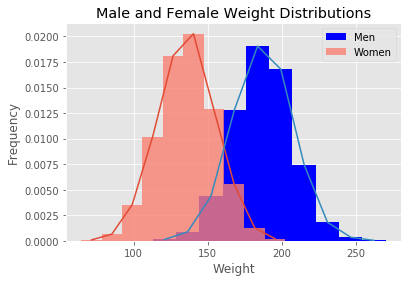

In [7]:
plt.hist(male_df.Weight, density=True, color='blue', bins=10, label='Men')
plt.hist(female_df.Weight, density=True, alpha = 0.8, color='salmon', bins=10, label='Women')
plt.legend()
plt.title('Male and Female Weight Distributions')
plt.xlabel('Weight')
plt.ylabel('Frequency')
x,y = density(female_df.Weight)
plt.plot(x,y)
x,y = density(male_df.Weight)
plt.plot(x,y)

## Write your observations in the cell below

In [8]:
# Record your observations - are these inline with your personal observations?
# The distributions are similar to those with male and female heights.  
# Men tend to be heavier and women lighter.  Men also appear to have a wider range of weights.  
# This is inline with my personal experience.


# What is the takeaway when comparing male and female heights and weights?
# The takeaway is that men tend to be larger than women, both in height and weight.

## Repeat Above experiments in seaborn and compare with your results

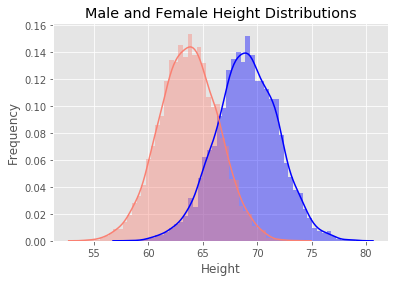

In [10]:
import seaborn as sns

sns.distplot(male_df.Height, color='blue')
sns.distplot(female_df.Height, color='salmon')
plt.title('Male and Female Height Distributions')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

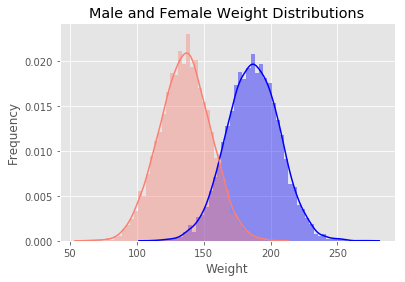

In [11]:
sns.distplot(male_df.Weight, color='blue')
sns.distplot(female_df.Weight, color='salmon')
plt.title('Male and Female Weight Distributions')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [12]:
# Your comments on the two approaches here. 
# are they similar ? what makes them different if they are ?

#Seaborn is much easier to use as it combines the two steps from above.  
#Rather than spending time plotting the histogram and the density function, 
#you can do it all at once in seaborn without any extra parameters. Seaborn also automatically shows overlap.

## Summary

In this lesson you learned how to build the probability density curves visually for a given datasets, and compare the distributions visually by looking at the spread, center and overlap. This is a useful EDA technique and can be used to answer some initial questions before embarking on a complex analytics journey.